1.1 Biến đổi cường độ ảnh (Image inverse transformation)

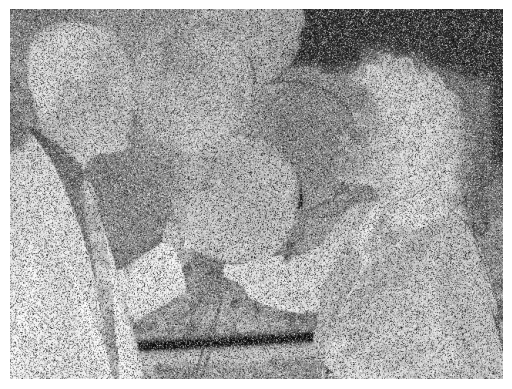

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pylab as plt

# Mở hình ảnh grayscale
img = Image.open('balloons_noisy.png').convert('L')

# Chuyển đổi hình ảnh thành ndarray
im1 = np.asarray(img)

# Thực hiện phép đảo ngược cường độ
im2 = 255 - im1  # Sử dụng dấu trừ để đảo ngược cường độ

# Chuyển đổi im2 từ ndarray thành hình ảnh
new_img = Image.fromarray(im2)

# Hiển thị hình ảnh gốc và hình ảnh đã đảo ngược
img.show()
plt.imshow(new_img, cmap='gray')  # Đảm bảo hiển thị đúng màu xám
plt.axis('off')  # Ẩn trục
plt.show()

1.2 Thay đổi chất lượng ảnh với Power law

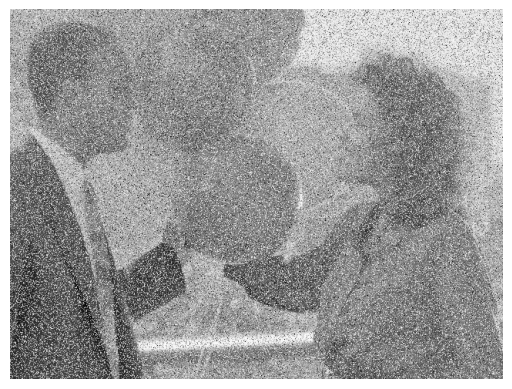

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pylab as plt

# Mở hình ảnh grayscale
img = Image.open('balloons_noisy.png').convert('L')

# Chuyển đổi hình ảnh thành ndarray
im1 = np.asarray(img)

# Khởi tạo gamma
gamma = 0.5

# Chuyển đổi ndarray từ int sang float
bl = im1.astype(float)

# Tìm giá trị tối đa trong bl
b2 = np.max(bl)

# Normal hóa bl
b3 = bl / b2

# Tránh chia cho 0 trước khi tính log
b3 = np.clip(b3, 1e-10, None)  # Thay thế giá trị nhỏ hơn 1e-10 bằng 1e-10

# Tính toán chỉ số gamma correction
b2 = np.log(b3) * gamma

# Tính toán gamma correction
c = np.exp(b2) * 255.0

# Chuyển đổi c thành kiểu int
c1 = c.astype(np.uint8)  # Sử dụng uint8 để tránh lỗi

# Chuyển đổi lại thành hình ảnh
d = Image.fromarray(c1)

# Hiển thị hình ảnh gốc và hình ảnh đã chỉnh sửa
img.show()
d.show()
plt.imshow(d, cmap='gray')
plt.axis('off')  # Ẩn trục
plt.show()

1.3 Thay đổi cường độ điểm ảnh với Log Transformation

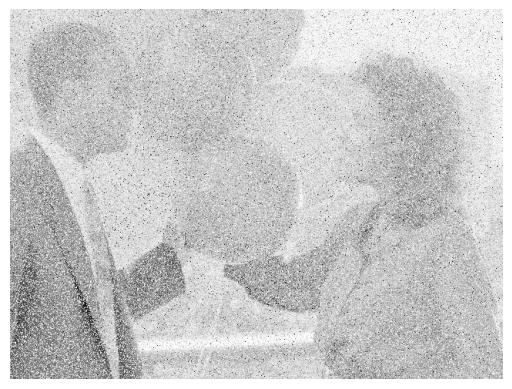

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pylab as plt

# Mở hình ảnh grayscale
img = Image.open('balloons_noisy.png').convert('L')

# Chuyển đổi hình ảnh thành ndarray
im1 = np.asarray(img)

# Chuyển đổi ndarray từ int sang float
bl = im1.astype(float)

# Tìm giá trị tối đa trong bl
b2 = np.max(bl)

# Thực hiện log transformation
c = (128.0 * np.log1p(bl)) / np.log1p(b2)  # Sử dụng np.log1p để tránh log(0)

# Chuyển đổi c thành kiểu uint8
c1 = np.clip(c, 0, 255).astype(np.uint8)  # Đảm bảo giá trị nằm trong khoảng [0, 255]

# Chuyển đổi lại thành hình ảnh
d = Image.fromarray(c1)

# Hiển thị hình ảnh gốc và hình ảnh đã chỉnh sửa
img.show()
d.show()
plt.imshow(d, cmap='gray')
plt.axis('off')  # Ẩn trục
plt.show()

1.4 Histogram  equalization

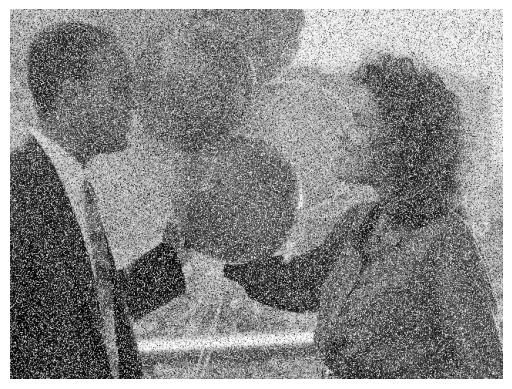

In [7]:
from PIL import Image
import numpy as np
import matplotlib.pylab as plt

# Mở hình ảnh grayscale
img = Image.open('balloons_noisy.png').convert('L')

# Chuyển đổi hình ảnh thành ndarray
iml = np.asarray(img)

# Chuyển đổi 2D ndarray thành 1D array
bl = iml.flatten()

# Tính toán histogram và bin
hist, bins = np.histogram(iml, 256, [0, 255])

# Tính toán cumulative distribution function (CDF)
cdf = hist.cumsum()

# Mask các nơi cdf = 0
cdf_m = np.ma.masked_equal(cdf, 0)

# Histogram equalization
num_cdf_m = (cdf_m - cdf_m.min()) * 255
den_cdf_m = (cdf.max() - cdf_m.min())
cdf_m = num_cdf_m / den_cdf_m

# Các giá trị cdf trong mask giờ là 0
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

# Gán các giá trị cdf vào mảng đã flatten
im2 = cdf[bl]

# im2 là 1D, dùng reshape để chuyển về 2D
im3 = np.reshape(im2, iml.shape)

# Chuyển đổi im3 thành hình ảnh
im4 = Image.fromarray(im3)

# Hiển thị hình ảnh gốc và hình ảnh đã chỉnh sửa
img.show()
im4.show()
plt.imshow(im4, cmap='gray')
plt.axis('off')  # Ẩn trục
plt.show()

1.5 Thay đổi ảnh với contrast Stretching

0 255


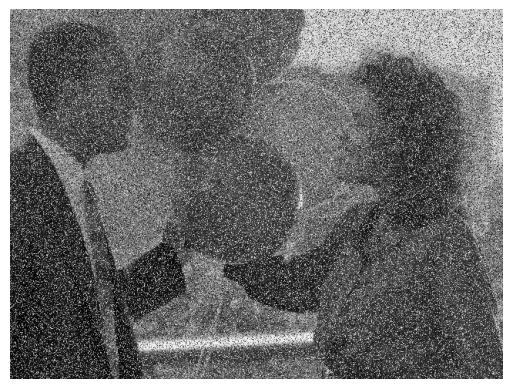

In [8]:
from PIL import Image
import numpy as np
import matplotlib.pylab as plt

# Mở hình ảnh grayscale
img = Image.open('balloons_noisy.png').convert('L')

# Chuyển đổi hình ảnh thành ndarray
iml = np.asarray(img)

# Tìm giá trị tối đa và tối thiểu của pixel
b = iml.max()
a = iml.min()
print(a, b)

# Chuyển đổi iml sang float
C = iml.astype(float)

# Thực hiện contrast stretching transformation
im2 = 255 * (C - a) / (b - a)  # Đảm bảo không chia cho 0

# Chuyển đổi im2 từ ndarray thành hình ảnh
im3 = Image.fromarray(np.clip(im2, 0, 255).astype(np.uint8))  # Đảm bảo giá trị nằm trong khoảng [0, 255]

# Hiển thị hình ảnh gốc và hình ảnh đã chỉnh sửa
img.show()
im3.show()
plt.imshow(im3, cmap='gray')
plt.axis('off')  # Ẩn trục
plt.show()

1.6.1 Biến đổi ảnh với Fast Fourier

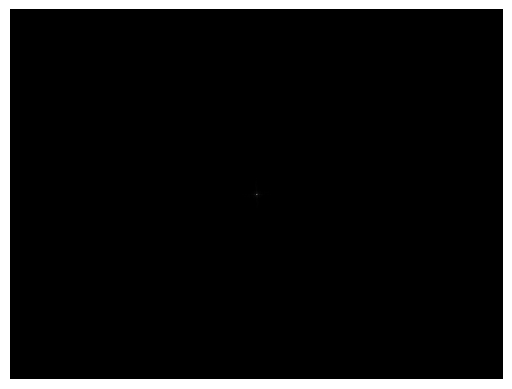

In [9]:
from PIL import Image
import numpy as np
import scipy.fftpack
import matplotlib.pylab as plt

# Mở hình ảnh grayscale
img = Image.open('balloons_noisy.png').convert('L')

# Chuyển đổi hình ảnh thành ndarray
iml = np.asarray(img)

# Thực hiện FFT
c = np.abs(scipy.fftpack.fft2(iml))

# Dịch chuyển hình ảnh tần số Fourier
d = scipy.fftpack.fftshift(c)

# Chuyển đổi d thành kiểu float
d = d.astype(float)

# Chuyển đổi d từ ndarray thành hình ảnh
# Chúng ta cần chuẩn hóa để giá trị nằm trong khoảng [0, 255]
d_normalized = (d / np.max(d) * 255).astype(np.uint8)
im3 = Image.fromarray(d_normalized)

# Hiển thị hình ảnh gốc và hình ảnh đã biến đổi
img.show()
im3.show()
plt.imshow(im3, cmap='gray')
plt.axis('off')  # Ẩn trục
plt.show()

1.6.2 Lọc ảnh trong miền tần suất

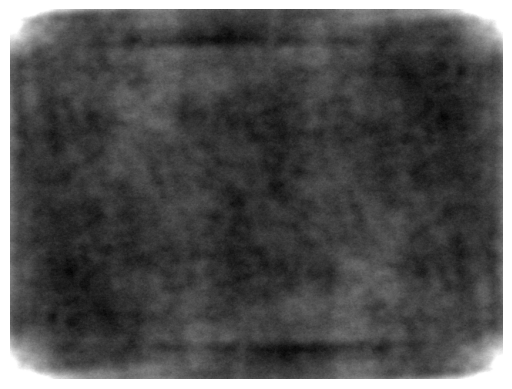

In [10]:
from PIL import Image
import numpy as np
import scipy.fftpack
import matplotlib.pylab as plt
import math

# Mở hình ảnh grayscale
img = Image.open('balloons_noisy.png').convert('L')

# Chuyển đổi hình ảnh thành ndarray
iml = np.asarray(img)

# Thực hiện FFT
c = abs(scipy.fftpack.fft2(iml))

# Dịch chuyển hình ảnh tần số Fourier
d = scipy.fftpack.fftshift(c)

# Khởi tạo biến cho hàm convolution
M, N = d.shape

# Định nghĩa H và khởi tạo giá trị
H = np.ones((M, N))
centerl = M / 2
center2 = N / 2
d0 = 30.0  # bán kính cắt
t1 = 1  # bậc của BLPF (Butterworth Lowpass Filter)

# Định nghĩa hàm convolution cho BLPF
for i in range(M):
    for j in range(N):
        rl = (i - centerl) ** 2 + (j - center2) ** 2
        r = math.sqrt(rl)  # Tính khoảng cách Euclidean từ gốc
        # Sử dụng bán kính cắt để loại bỏ tần số cao
        if r > d0:
            H[i, j] = 1 / (1 + (r / d0) ** t1)

# H được chuyển đổi từ ndarray sang float
H = H.astype(float)

# Thực hiện convolution
con = d * H  # Nhân BLPF với FFT của hình ảnh

# Tính toán độ lớn của FFT ngược
e = abs(scipy.fftpack.ifft2(con))

# e được chuyển đổi từ ndarray thành hình ảnh
e = np.clip(e, 0, 255).astype(np.uint8)  # Đảm bảo giá trị nằm trong khoảng [0, 255]
im3 = Image.fromarray(e)

# Hiển thị hình ảnh gốc và hình ảnh đã lọc
img.show()
im3.show()
plt.imshow(im3, cmap='gray')
plt.axis('off')  # Ẩn trục
plt.show()

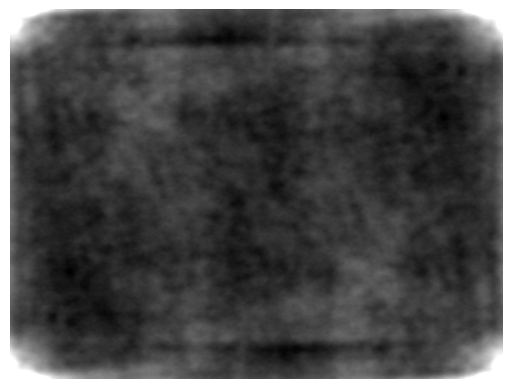

In [12]:
from PIL import Image
import numpy as np
import scipy.fftpack
import matplotlib.pylab as plt
import math

# Mở hình ảnh grayscale
img = Image.open('balloons_noisy.png').convert('L')

# Chuyển đổi hình ảnh thành ndarray
iml = np.asarray(img)

# Thực hiện FFT
c = np.abs(scipy.fftpack.fft2(iml))

# Dịch chuyển hình ảnh tần số Fourier
d = scipy.fftpack.fftshift(c)

# Khởi tạo biến cho hàm convolution
M, N = d.shape
H = np.ones((M, N))
centerl, center2 = M / 2, N / 2
d0 = 30.0  # bán kính cắt
t1 = 1  # bậc của BLPF

# Định nghĩa hàm convolution cho BLPF
for i in range(M):
    for j in range(N):
        rl = (i - centerl) ** 2 + (j - center2) ** 2
        r = math.sqrt(rl)  # Tính khoảng cách Euclidean từ gốc
        # Sử dụng bán kính cắt để loại bỏ tần số cao
        if r > d0:
            H[i, j] = 1 / (1 + (r / d0) ** (2 * t1))

# H được chuyển đổi từ ndarray sang float
H = H.astype(float)

# Thực hiện convolution
con = d * H  # Nhân BLPF với FFT của hình ảnh

# Tính toán độ lớn của FFT ngược
e = np.abs(scipy.fftpack.ifft2(scipy.fftpack.ifftshift(con)))

# e được chuyển đổi từ ndarray thành hình ảnh
e = np.clip(e, 0, 255).astype(np.uint8)  # Đảm bảo giá trị nằm trong khoảng [0, 255]
im3 = Image.fromarray(e)

# Hiển thị hình ảnh gốc và hình ảnh đã lọc
img.show()
im3.show()
plt.imshow(im3, cmap='gray')
plt.axis('off')  # Ẩn trục
plt.show()

In [1]:
pip install opencv-python numpy matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\hotro\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


2. Bài tập

1. Viết chương trình tạo menu cho phép người dùng chọn các phương pháp biến đổi ảnh như sau:
- Image inverse transformation
- Gamma-Correction
- Log Transformation
- Histogram equalization
- Contrast Stretching

Khi người dùng ấn phím I, G, L, H, C thì chương trình sẽ thực hiện hàm tương ứng cho các hình trong thư mục exercise. Lưu và hiển thị các ảnh đã biến đổi.

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def image_inverse(img):
    return 255 - img

def gamma_correction(img, gamma=2.2):
    norm_img = img / 255.0
    corrected = np.power(norm_img, gamma)
    return np.uint8(corrected * 255)

def log_transform(img):
    c = 255 / np.log(1 + np.max(img))
    return np.uint8(c * np.log(1 + img))

def histogram_equalization(img):
    if len(img.shape) == 2:
        return cv2.equalizeHist(img)
    else:
        ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
        ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])
        return cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)

def contrast_stretching(img):
    a, b = np.min(img), np.max(img)
    stretched = (img - a) * (255 / (b - a))
    return np.uint8(stretched)

def apply_transformation1(key, img):
    if key == 'I':
        return image_inverse(img)
    elif key == 'G':
        return gamma_correction(img)
    elif key == 'L':
        return log_transform(img)
    elif key == 'H':
        return histogram_equalization(img)
    elif key == 'C':
        return contrast_stretching(img)

def main_transform1():
    keys = ['I', 'G', 'L', 'H', 'C']
    for file in os.listdir('exercise'):
        img = cv2.imread(f'exercise/{file}')
        for key in keys:
            result = apply_transformation1(key, img)
            out_path = f'exercise/{key}_{file}'
            cv2.imwrite(out_path, result)
            cv2.imshow(f'{key}_{file}', result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

2. Viết chương trình tạo menu cho phép người dùng chọn các phương pháp biến đổi ảnh như sau:
- Fast Fourier 
- Butterworth Lowpass Filter
- Butterworth Highpass Filter 

Khi người dùng ấn phím F, L, H thì chương trình sẽ thực hiện hàm tương ứng cho các hình trong thư mục exercise. Lưu và hiển thị các ảnh đã biến đổi. 

In [5]:
def fft_transform(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    dft = np.fft.fft2(gray)
    dft_shift = np.fft.fftshift(dft)
    magnitude = 20 * np.log(np.abs(dft_shift))
    return np.uint8(np.clip(magnitude, 0, 255))

def butterworth_lowpass(img, D0=30, n=2):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    M, N = gray.shape
    u = np.arange(M)
    v = np.arange(N)
    U, V = np.meshgrid(u - M//2, v - N//2, indexing='ij')
    D = np.sqrt(U**2 + V**2)
    H = 1 / (1 + (D / D0)**(2 * n))

    dft = np.fft.fft2(gray)
    dft_shift = np.fft.fftshift(dft)
    result = dft_shift * H
    inv_dft = np.fft.ifft2(np.fft.ifftshift(result))
    return np.uint8(np.abs(inv_dft))

def butterworth_highpass(img, D0=30, n=2):
    return 255 - butterworth_lowpass(img, D0, n)

def apply_transformation2(key, img):
    if key == 'F':
        return fft_transform(img)
    elif key == 'L':
        return butterworth_lowpass(img)
    elif key == 'H':
        return butterworth_highpass(img)

def main_transform2():
    keys = ['F', 'L', 'H']
    for file in os.listdir('exercise'):
        img = cv2.imread(f'exercise/{file}')
        for key in keys:
            result = apply_transformation2(key, img)
            out_path = f'exercise/{key}_freq_{file}'
            cv2.imwrite(out_path, result)
            cv2.imshow(f'{key}_freq_{file}', result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

3. Viết chương trình thay đổi thứ tự màu RGB của ảnh trong thư mục exercise và sử dụng ngẫu nhiên một trong các phép biến đổi ảnh trong câu 1. Lưu và hiển thị ảnh đã biến đổi.

In [6]:
import random

def swap_rgb(img):
    return img[:, :, [2, 1, 0]]

def main_task3():
    keys = ['I', 'G', 'L', 'H', 'C']
    for file in os.listdir('exercise'):
        img = cv2.imread(f'exercise/{file}')
        img_swapped = swap_rgb(img)
        key = random.choice(keys)
        result = apply_transformation1(key, img_swapped)
        cv2.imwrite(f'exercise/task3_{key}_{file}', result)
        cv2.imshow(f'task3_{key}_{file}', result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

4. Viết chương trình thay đổi thứ tự màu RGB của ảnh trong thư mục exercise và sử dụng ngẫu nhiên một trong các phép biến đổi ảnh trong câu 2. Nếu ngẫu nhiên là phép Butterworth Lowpass thì chọn thêm Min Filter để lọc ảnh. Nếu ngẫu nhiên là phép Butterworth Highpass thì chọn thêm Max Filter để lọc ảnh. Lưu và hiển thị ảnh đã biến đổi.

In [ ]:
from scipy.ndimage import minimum_filter, maximum_filter

def main_task4():
    keys = ['F', 'L', 'H']
    for file in os.listdir('exercise'):
        img = cv2.imread(f'exercise/{file}')
        img_swapped = swap_rgb(img)
        key = random.choice(keys)
        result = apply_transformation2(key, img_swapped)
        
        if key == 'L':
            result = minimum_filter(result, size=3)
        elif key == 'H':
            result = maximum_filter(result, size=3)

        cv2.imwrite(f'exercise/task4_{key}_{file}', result)
        cv2.imshow(f'task4_{key}_{file}', result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()